# Merging Dataframes
- **Union**: All the surface. In Pandas: full **outer** join
- **Intersection**: Just what is common to both sets, or **inner** join
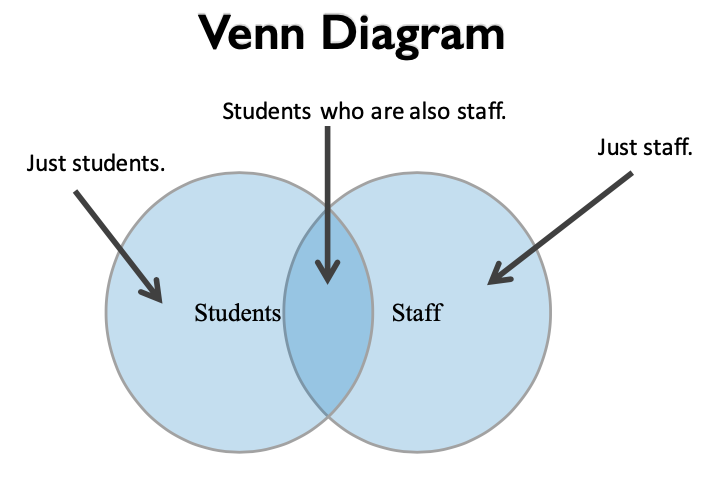

In [ ]:
import pandas as pd

staff_df = pd.DataFrame([{'Name':'Kelly', 'Role': 'Director of HR'},
                   {'Name':'Sally', 'Role': 'Course liasion'},
                   {'Name':'James', 'Role': 'Grader'}
                   ])
staff_df = staff_df.set_index('Name')
staff_df

,Role
Name,
Kelly,Director of HR
Sally,Course liasion
James,Grader


In [ ]:
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                          {'Name': 'Peter', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])

student_df = student_df.set_index('Name')
student_df

,School
Name,
James,Business
Peter,Law
Sally,Engineering


We see that both Sally and James are students **and** staff. If we want an union (a full outer join) then:

In [ ]:
pd.merge(staff_df, student_df, how = 'outer', left_index= True, right_index = True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Peter,NaN,Law
Sally,Course liasion,Engineering


But, if we want an **intersection**, then use the argument **inner**:

In [ ]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

,Role,School
Name,,
Sally,Course liasion,Engineering
James,Grader,Business


Another **set addition**. If we want to get a list of all staff regarless if they are students or no. If they happen to be students, we want to get their student details
![](https://dq-blog-files.s3.amazonaws.com/joins-tutorial/join_venn_diagram.svg)

In [ ]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


Other merge parameters.  You don't need to use indices to join on, you can use also columns. Let's use the **on** parameter:

In [ ]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()

In [ ]:
pd.merge(staff_df, student_df, how="right", on='Name')

,Name,Role,School
0,James,Grader,Business
1,Peter,NaN,Law
2,Sally,Course liasion,Engineering


Let's add location to the people. Some of them live in the same place

In [ ]:
staff_df = pd.DataFrame([{'Name':'Kelly', 'Role': 'Director of HR', 'Location': 'Sesame Street'},
                   {'Name':'Sally', 'Role': 'Course liasion', 'Location': 'Washington Street'},
                   {'Name':'James', 'Role': 'Grader', 'Location': 'Washington Street'}
                   ])

student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': 'Boulevard'},
                          {'Name': 'Peter', 'School': 'Law', 'Location': 'Paseo Independecia'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': 'Sagasta'}])

- x left
- y right

In [ ]:
pd.merge(staff_df, student_df, how='left', on='Name')

,Name,Role,Location_x,School,Location_y
0,Kelly,Director of HR,Sesame Street,NaN,NaN
1,Sally,Course liasion,Washington Street,Engineering,Sagasta
2,James,Grader,Washington Street,Business,Boulevard


Let's add the last names of the people. Only Sally Juepi is the same person in both groups

In [ ]:
staff_df = pd.DataFrame([{'First Name':'Kelly', 'Last Name': 'Garcia', 'Role': 'Director of HR'},
                   {'First Name':'Sally', 'Last Name': 'Juepi','Role': 'Course liasion'},
                   {'First Name':'James', 'Last Name': 'Xoxo','Role': 'Grader'}
                   ])

student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Jaime','School': 'Business'},
                          {'First Name': 'Peter', 'Last Name': 'El negro','School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Juepi','School': 'Engineering'}])



In [ ]:
pd.merge(staff_df, student_df, how='inner', on=['First Name', 'Last Name'])

,First Name,Last Name,Role,School
0,Sally,Juepi,Course liasion,Engineering


- Joining horizontally
- Concatenating vertically

```python
frames = [df1, df2, df3]
pd.concat(frames, keys = ['2011', '2012', '2013'])
```


# Panda idioms

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('census.csv')
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


## method chaining
First we select a row, and then with the second set of brakets we select a column

In [ ]:
df.iloc[1]['CENSUS2010POP']

54571

In [ ]:
(df.where(df['SUMLEV']==50) # We pass a boolean mask which is only true WHERE  sumlev == 50
    .dropna() # we drop the missing values (.where doesnt drop)
    .set_index(['STNAME', 'CTYNAME'])
    .rename(columns={'ESTIMATESBASE2010': 'Estimate base 2010'}))

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County       50.0     3.0       6.0    1.0     1.0   
        Baldwin County       50.0     3.0       6.0    1.0     3.0   
        Barbour County       50.0     3.0       6.0    1.0     5.0   
        Bibb County          50.0     3.0       6.0    1.0     7.0   
        Blount County        50.0     3.0       6.0    1.0     9.0   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County    50.0     4.0       8.0   56.0    37.0   
        Teton County         50.0     4.0       8.0   56.0    39.0   
        Uinta County         50.0     4.0       8.0   56.0    41.0   
        Washakie County      50.0     4.0       8.0   56.0    43.0   
        Weston County        50.0     4.0       8.0   56.0    45.0   

                           CENSUS2010POP  Estimate base 2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                                 
Alabama Autauga County           54571.0             54571.0          54660.0   
        Baldwin County          182265.0            182265.0         183193.0   
        Barbour County           27457.0             27457.0          27341.0   
        Bibb County              22915.0             22919.0          22861.0   
        Blount County            57322.0             57322.0          57373.0   
...                                  ...                 ...              ...   
Wyoming Sweetwater County        43806.0             43806.0          43593.0   
        Teton County             21294.0             21294.0          21297.0   
        Uinta County             21118.0             21118.0          21102.0   
        Washakie County           8533.0              8533.0           8545.0   
        Weston County             7208.0              7208.0           7181.0   

                           POPESTIMATE2011  POPESTIMATE2012  ...  \
STNAME  CTYNAME                                              ...   
Alabama Autauga County             55253.0          55175.0  ...   
        Baldwin County            186659.0         190396.0  ...   
        Barbour County             27226.0          27159.0  ...   
        Bibb County                22733.0          22642.0  ...   
        Blount County              57711.0          57776.0  ...   
...                                    ...              ...  ...   
Wyoming Sweetwater County          44041.0          45104.0  ...   
        Teton County               21482.0          21697.0  ...   
        Uinta County               20912.0          20989.0  ...   
        Washakie County             8469.0           8443.0  ...   
        Weston County               7114.0           7065.0  ...   

                           RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME                                                 
Alabama Autauga County             7.242091         -2.915927   
        Baldwin County            14.832960         17.647293   
        Barbour County            -4.728132         -2.500690   
        Bibb County               -5.527043         -5.068871   
        Blount County              1.807375         -1.177622   
...                                     ...               ...   
Wyoming Sweetwater County          1.072643         16.243199   
        Teton County              -1.589565          0.972695   
        Uinta County             -17.755986         -4.916350   
        Washakie County          -11.637475         -0.827815   
        Weston County            -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904217   
      

BUT is much faster to do the same in a **non-pandorable** way

In [ ]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV'] == 50]
df.set_index(['STNAME', 'CTYNAME'], inplace=True)
df = df.rename(columns={'ESTIMATESBASE2010': 'Estimate base 2010'})

df

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County         50       3         6      1       1   
        Baldwin County         50       3         6      1       3   
        Barbour County         50       3         6      1       5   
        Bibb County            50       3         6      1       7   
        Blount County          50       3         6      1       9   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County      50       4         8     56      37   
        Teton County           50       4         8     56      39   
        Uinta County           50       4         8     56      41   
        Washakie County        50       4         8     56      43   
        Weston County          50       4         8     56      45   

                           CENSUS2010POP  Estimate base 2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                                 
Alabama Autauga County             54571               54571            54660   
        Baldwin County            182265              182265           183193   
        Barbour County             27457               27457            27341   
        Bibb County                22915               22919            22861   
        Blount County              57322               57322            57373   
...                                  ...                 ...              ...   
Wyoming Sweetwater County          43806               43806            43593   
        Teton County               21294               21294            21297   
        Uinta County               21118               21118            21102   
        Washakie County             8533                8533             8545   
        Weston County               7208                7208             7181   

                           POPESTIMATE2011  POPESTIMATE2012  ...  \
STNAME  CTYNAME                                              ...   
Alabama Autauga County               55253            55175  ...   
        Baldwin County              186659           190396  ...   
        Barbour County               27226            27159  ...   
        Bibb County                  22733            22642  ...   
        Blount County                57711            57776  ...   
...                                    ...              ...  ...   
Wyoming Sweetwater County            44041            45104  ...   
        Teton County                 21482            21697  ...   
        Uinta County                 20912            20989  ...   
        Washakie County               8469             8443  ...   
        Weston County                 7114             7065  ...   

                           RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME                                                 
Alabama Autauga County             7.242091         -2.915927   
        Baldwin County            14.832960         17.647293   
        Barbour County            -4.728132         -2.500690   
        Bibb County               -5.527043         -5.068871   
        Blount County              1.807375         -1.177622   
...                                     ...               ...   
Wyoming Sweetwater County          1.072643         16.243199   
        Teton County              -1.589565          0.972695   
        Uinta County             -17.755986         -4.916350   
        Washakie County          -11.637475         -0.827815   
        Weston County            -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904217   
      

# apply
Python has a method called **map**. You pass a function and a list to map, and it applies that function to all the members of the list. In Pandas, something similar is **apply**

In [ ]:
def min_max(row):
  data = row[['POPESTIMATE2010',
              'POPESTIMATE2011',
              'POPESTIMATE2012',
              'POPESTIMATE2013']]
  # "data" is a new dataframe with columns named POPESTIMATE2010, POPESTIMATE2011 ... and each row is a county
  #return data
  return pd.Series({'min': np.min(data), 'max': np.max(data)})
  

`apply` takes 2 parameters, the **function** and the **axis** on which to operate.
The *axis* parameter indicates the index to use

In [ ]:
# this will tell the min and max in all the years for each county
df.apply(min_max, axis='columns').head()

min       max
STNAME  CTYNAME                           
Alabama Autauga County   54660.0   55253.0
        Baldwin County  183193.0  195126.0
        Barbour County   26973.0   27341.0
        Bibb County      22512.0   22861.0
        Blount County    57373.0   57776.0

Another way to do the same is:

In [ ]:
def min_max(row):
  data = row[['POPESTIMATE2010',
              'POPESTIMATE2011',
              'POPESTIMATE2012',
              'POPESTIMATE2013']]
  row['max'] = np.max(data)
  row['min'] = np.min(data)
  # "data" is a new dataframe with columns named POPESTIMATE2010, POPESTIMATE2011 ... and each row is a county
  #return data
  return row


df.apply(min_max, axis='columns').head()

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                   
Alabama Autauga County    50.0     3.0       6.0    1.0     1.0   
        Baldwin County    50.0     3.0       6.0    1.0     3.0   
        Barbour County    50.0     3.0       6.0    1.0     5.0   
        Bibb County       50.0     3.0       6.0    1.0     7.0   
        Blount County     50.0     3.0       6.0    1.0     9.0   

                        CENSUS2010POP  Estimate base 2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                              
Alabama Autauga County        54571.0             54571.0          54660.0   
        Baldwin County       182265.0            182265.0         183193.0   
        Barbour County        27457.0             27457.0          27341.0   
        Bibb County           22915.0             22919.0          22861.0   
        Blount County         57322.0             57322.0          57373.0   

                        POPESTIMATE2011  POPESTIMATE2012  ...  \
STNAME  CTYNAME                                           ...   
Alabama Autauga County          55253.0          55175.0  ...   
        Baldwin County         186659.0         190396.0  ...   
        Barbour County          27226.0          27159.0  ...   
        Bibb County             22733.0          22642.0  ...   
        Blount County           57711.0          57776.0  ...   

                        RDOMESTICMIG2013  RDOMESTICMIG2014  RDOMESTICMIG2015  \
STNAME  CTYNAME                                                                
Alabama Autauga County         -3.012349          2.265971         -2.530799   
        Baldwin County         21.845705         19.243287         17.197872   
        Barbour County         -7.056824         -3.904217        -10.543299   
        Bibb County            -6.201001         -0.177537          0.177258   
        Blount County          -1.748766         -2.062535         -1.369970   

                        RNETMIG2011  RNETMIG2012  RNETMIG2013  RNETMIG2014  \
STNAME  CTYNAME                                                              
Alabama Autauga County     7.606016    -2.626146    -2.722002     2.592270   
        Baldwin County    15.844176    18.559627    22.727626    20.317142   
        Barbour County    -4.874741    -2.758113    -7.167664    -3.978583   
        Bibb County       -5.088389    -4.363636    -5.403729     0.754533   
        Blount County      1.859511    -0.848580    -1.402476    -1.577232   

                        RNETMIG2015       max       min  
STNAME  CTYNAME                                          
Alabama Autauga County    -2.187333   55253.0   54660.0  
        Baldwin County    18.293499  195126.0  183193.0  
        Barbour County   -10.543299   27341.0   26973.0  
        Bibb County        1.107861   22861.0   22512.0  
        Blount County     -0.884411   57776.0   57373.0  

[5 rows x 100 columns]

Previous code also gets the same result in professor's lesson...well...

Another way to do it is by using **lambdas**

In [ ]:
rows = ['POPESTIMATE2010',
              'POPESTIMATE2011',
              'POPESTIMATE2012',
              'POPESTIMATE2013']


df.apply(lambda x: np.max(x[rows]), axis = 1).head()

STNAME   CTYNAME       
Alabama  Autauga County     55253.0
         Baldwin County    195126.0
         Barbour County     27341.0
         Bibb County        22861.0
         Blount County      57776.0
dtype: float64

Task: divide the states into 4 categories

In [ ]:
def get_state_region(x):
    northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 
                 'Rhode Island','Vermont','New York','New Jersey','Pennsylvania']
    midwest = ['Illinois','Indiana','Michigan','Ohio','Wisconsin','Iowa',
               'Kansas','Minnesota','Missouri','Nebraska','North Dakota',
               'South Dakota']
    south = ['Delaware','Florida','Georgia','Maryland','North Carolina',
             'South Carolina','Virginia','District of Columbia','West Virginia',
             'Alabama','Kentucky','Mississippi','Tennessee','Arkansas',
             'Louisiana','Oklahoma','Texas']
    west = ['Arizona','Colorado','Idaho','Montana','Nevada','New Mexico','Utah',
            'Wyoming','Alaska','California','Hawaii','Oregon','Washington']
    
    if x in northeast:
        return "Northeast"
    elif x in midwest:
        return "Midwest"
    elif x in south:
        return "South"
    else:
        return "West"

In [ ]:
df['State region'] = df['STNAME'].apply(lambda x: get_state_region(x))
df

KeyError: ignored

# Group by

`.groupby()` 
1. takes some dataframes
2. splits it in chunks based on some key values
3. Applies computations on those chunks
4. Combines the results into another dataframe

This is known as:
**split-apply-combines**

Task for each state, take the average of all its counties
**split-apply-combines**
- **split**: split the different states
- **apply**: do the average for each state
- **combines**: then combine the averages in a new dataframe

In [ ]:
df = pd.read_csv('census.csv')
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


Remove the rows where SUMLEV == 40

In [ ]:
df = df[df['SUMLEV'] == 50]


For every county of a state, do the average

In [ ]:
state_list = df['STNAME'].unique()


In [ ]:

%%timeit -n 3

for state in state_list:
  avg = np.average(df[df['STNAME'] == state]['CENSUS2010POP'])

  print('Counties in state ' + state + ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

but this is very slow. Let's do the same but this time using bygroup function.

.groupby return  2 values: **(group, frame)**. The first value is the value of the key we are groupping by, in this case a specific state name. And the second is the projected dataframe that was found for this group

In [ ]:
%%timeit -n 3
for group, frame in df.groupby('STNAME'):

  avg = np.average(frame['CENSUS2010POP'])
  print(group)

  print('Counties in state ' + group + ' have an average population of ' + str(avg))


Alabama
Counties in state Alabama have an average population of 71339.34328358209
Alaska
Counties in state Alaska have an average population of 24490.724137931036
Arizona
Counties in state Arizona have an average population of 426134.4666666667
Arkansas
Counties in state Arkansas have an average population of 38878.90666666667
California
Counties in state California have an average population of 642309.5862068966
Colorado
Counties in state Colorado have an average population of 78581.1875
Connecticut
Counties in state Connecticut have an average population of 446762.125
Delaware
Counties in state Delaware have an average population of 299311.3333333333
District of Columbia
Counties in state District of Columbia have an average population of 601723.0
Florida
Counties in state Florida have an average population of 280616.5671641791
Georgia
Counties in state Georgia have an average population of 60928.63522012578
Hawaii
Counties in state Hawaii have an average population of 272060.2
Idaho

Now let's split by using a function for example if we want to split all our data in 3 chuncks based on the first letter
- Group 1 till M
- Group 2 M to Q
- Group 3 Rest

In [ ]:
df = df.set_index('STNAME')
df.head()




,SUMLEV,REGION,DIVISION,STATE,COUNTY,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
STNAME,,,,,,,,,,,,,,,,,,,,,
Alabama,50,3,6,1,1,Autauga County,54571,54571,54660,55253,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
Alabama,50,3,6,1,3,Baldwin County,182265,182265,183193,186659,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
Alabama,50,3,6,1,5,Barbour County,27457,27457,27341,27226,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
Alabama,50,3,6,1,7,Bibb County,22915,22919,22861,22733,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
Alabama,50,3,6,1,9,Blount County,57322,57322,57373,57711,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [ ]:
def set_batch_number(index):
  if index[0] < 'M':
    return 0
  if index[0] < 'Q':
    return 1
  return 2

The dataframe is going to be groupped by batch number (0,1 or 2). We loop through each batch loop.
Notice that we dont pass a column name to groupby. Instead, first we set the index to be 'STNAME' AND **if no column is specified to groupby**, then automatically it uses the index

In [ ]:
for group, frame in df.groupby(set_batch_number):
  print("There are: " + str(len(frame)) + " in chunk number " + str(group))

There are: 1177 in chunk number 0
There are: 1134 in chunk number 1
There are: 831 in chunk number 2


## AIRBNB dataset

In [ ]:
df = pd.read_csv('listings.csv')

df = df.set_index(['cancellation_policy', 'review_scores_value'])
df.head()

id  \
cancellation_policy review_scores_value             
moderate            NaN                  12147973   
                    9.0                   3075044   
                    10.0                     6976   
                    10.0                  1436513   
flexible            10.0                  7651065   

                                                                   listing_url  \
cancellation_policy review_scores_value                                          
moderate            NaN                  https://www.airbnb.com/rooms/12147973   
                    9.0                   https://www.airbnb.com/rooms/3075044   
                    10.0                     https://www.airbnb.com/rooms/6976   
                    10.0                  https://www.airbnb.com/rooms/1436513   
flexible            10.0                  https://www.airbnb.com/rooms/7651065   

                                              scrape_id last_scraped  \
cancellation_policy review_scores_value                                
moderate            NaN                  20160906204935   2016-09-07   
                    9.0                  20160906204935   2016-09-07   
                    10.0                 20160906204935   2016-09-07   
                    10.0                 20160906204935   2016-09-07   
flexible            10.0                 20160906204935   2016-09-07   

                                                                                  name  \
cancellation_policy review_scores_value                                                  
moderate            NaN                                     Sunny Bungalow in the City   
                    9.0                              Charming room in pet friendly apt   
                    10.0                              Mexican Folk Art Haven in Boston   
                    10.0                 Spacious Sunny Bedroom Suite in Historic Home   
flexible            10.0                                           Come Home to Boston   

                                                                                   summary  \
cancellation_policy review_scores_value                                                      
moderate            NaN                  Cozy, sunny, family home.  Master bedroom high...   
                    9.0                  Charming and quiet room in a second floor 1910...   
                    10.0                 Come stay with a friendly, middle-aged guy in ...   
                    10.0                 Come experience the comforts of home away from...   
flexible            10.0                 My comfy, clean and relaxing home is one block...   

                                                                                     space  \
cancellation_policy review_scores_value                                                      
moderate            NaN                  The house has an open and cozy feel at the sam...   
                    9.0                  Small but cozy and quite room with a full size...   
                    10.0                 Come stay with a friendly, middle-aged guy in ...   
                    10.0                 Most places you find in Boston are small howev...   
flexible            10.0                 Clean, attractive, private room, one block fro...   

                                                                               description  \
cancellation_policy review_scores_value                                                      
moderate            NaN                  Cozy, sunny, family home.  Master bedroom high...   
                    9.0                  Charming and quiet room in a second floor 1910...   
                    10.0                 Come stay with a friendly, middle-aged guy in ...   
                    10.0                 Come experience the comforts of home away from...   
flexible            10.0                 My comfy, clean and relaxing home is one 

When we have a **multiindex**, we need to pass the **levels** that we are interested in grouping by 

In [ ]:
for group, frame in df.groupby(level=(0,1)):
  print(group)

('flexible', 2.0)
('flexible', 4.0)
('flexible', 5.0)
('flexible', 6.0)
('flexible', 7.0)
('flexible', 8.0)
('flexible', 9.0)
('flexible', 10.0)
('moderate', 2.0)
('moderate', 4.0)
('moderate', 6.0)
('moderate', 7.0)
('moderate', 8.0)
('moderate', 9.0)
('moderate', 10.0)
('strict', 2.0)
('strict', 3.0)
('strict', 4.0)
('strict', 5.0)
('strict', 6.0)
('strict', 7.0)
('strict', 8.0)
('strict', 9.0)
('strict', 10.0)
('super_strict_30', 6.0)
('super_strict_30', 7.0)
('super_strict_30', 8.0)
('super_strict_30', 9.0)
('super_strict_30', 10.0)


And what if we want to group by cancellation policy and whether the review is equal or different to "10"? Let's define a function to manage the groupings



In [ ]:
def grouping_fun(item):
  # We need to check the "rewiew" part of the index. item has the format (cancelation, review)
  if item[1] == 10:
    return (item[0], "10")
  else:
    return (item[0], "not 10" ) #Right now we just care to divide in 2 groups, 10 or not 10

for group, frame in df.groupby(by = grouping_fun):
  print(group)



('flexible', '10')
('flexible', 'not 10')
('moderate', '10')
('moderate', 'not 10')
('strict', '10')
('strict', 'not 10')
('super_strict_30', '10')
('super_strict_30', 'not 10')


In [ ]:
df.head()

id  \
cancellation_policy review_scores_value             
moderate            NaN                  12147973   
                    9.0                   3075044   
                    10.0                     6976   
                    10.0                  1436513   
flexible            10.0                  7651065   

                                                                   listing_url  \
cancellation_policy review_scores_value                                          
moderate            NaN                  https://www.airbnb.com/rooms/12147973   
                    9.0                   https://www.airbnb.com/rooms/3075044   
                    10.0                     https://www.airbnb.com/rooms/6976   
                    10.0                  https://www.airbnb.com/rooms/1436513   
flexible            10.0                  https://www.airbnb.com/rooms/7651065   

                                              scrape_id last_scraped  \
cancellation_policy review_scores_value                                
moderate            NaN                  20160906204935   2016-09-07   
                    9.0                  20160906204935   2016-09-07   
                    10.0                 20160906204935   2016-09-07   
                    10.0                 20160906204935   2016-09-07   
flexible            10.0                 20160906204935   2016-09-07   

                                                                                  name  \
cancellation_policy review_scores_value                                                  
moderate            NaN                                     Sunny Bungalow in the City   
                    9.0                              Charming room in pet friendly apt   
                    10.0                              Mexican Folk Art Haven in Boston   
                    10.0                 Spacious Sunny Bedroom Suite in Historic Home   
flexible            10.0                                           Come Home to Boston   

                                                                                   summary  \
cancellation_policy review_scores_value                                                      
moderate            NaN                  Cozy, sunny, family home.  Master bedroom high...   
                    9.0                  Charming and quiet room in a second floor 1910...   
                    10.0                 Come stay with a friendly, middle-aged guy in ...   
                    10.0                 Come experience the comforts of home away from...   
flexible            10.0                 My comfy, clean and relaxing home is one block...   

                                                                                     space  \
cancellation_policy review_scores_value                                                      
moderate            NaN                  The house has an open and cozy feel at the sam...   
                    9.0                  Small but cozy and quite room with a full size...   
                    10.0                 Come stay with a friendly, middle-aged guy in ...   
                    10.0                 Most places you find in Boston are small howev...   
flexible            10.0                 Clean, attractive, private room, one block fro...   

                                                                               description  \
cancellation_policy review_scores_value                                                      
moderate            NaN                  Cozy, sunny, family home.  Master bedroom high...   
                    9.0                  Charming and quiet room in a second floor 1910...   
                    10.0                 Come stay with a friendly, middle-aged guy in ...   
                    10.0                 Come experience the comforts of home away from...   
flexible            10.0                 My comfy, clean and relaxing home is one 

There are 3 main categories of data processing happening during the apply step:

1. **Aggregation** of group data
2. **Transformation** of group data
3. **Filtration** of group data

## Aggreation
The most easy apply step is aggregation, a method called **agg()** in the **.groupby()** object

With agg we can pass a dictionary of the columns we are interested

In [ ]:
df = df.reset_index()

Now let's group by the cancellation policy and find the average score by group. np.nanmean is similar to np.average but it doesnt take into account NaN values

In [ ]:
df.groupby('cancellation_policy').agg({"review_scores_value": np.nanmean})

,review_scores_value
cancellation_policy,
flexible,9.237421
moderate,9.307398
strict,9.081441
super_strict_30,8.537313


We can extend the dictionary to aggregate by multiple columns

In [ ]:
df.groupby('cancellation_policy').agg({"review_scores_value": (np.nanmean, np.nanstd), "reviews_per_month": np.nanmean
                                       })

review_scores_value           reviews_per_month
                                nanmean    nanstd           nanmean
cancellation_policy                                                
flexible                       9.237421  1.096271          1.829210
moderate                       9.307398  0.859859          2.391922
strict                         9.081441  1.040531          1.873467
super_strict_30                8.537313  0.840785          0.340143

## Transformation
agg returns a single value per column (one row per group).
On the other hand, transform retruns an object the same size of the group. It boradcast the function you provide, over the group dataframe returning a new dataframe.

Example: include the average rating value in a given group by cancellation policy, but preserve the dataframe so we can do the difference between and individual observation and the sum

In [ ]:
columns_of_interest = ['cancellation_policy', "review_scores_value"]
transformed_df = df[columns_of_interest].groupby('cancellation_policy').transform(np.nanmean)
transformed_df.head()

,review_scores_value
0,9.307398
1,9.307398
2,9.307398
3,9.307398
4,9.237421


First, let's **rename** the column because that is not the `review_scores_value` but the `mean_review_scores`

In [ ]:
transformed_df.rename({'review_scores_value': 'mean_review_scores'}, axis = 'columns', inplace=True)
transformed_df.head()

,mean_review_scores
0,9.307398
1,9.307398
2,9.307398
3,9.307398
4,9.237421


Now mergeboth data frames, the original df and the transformed one

In [ ]:
df = df.merge(transformed_df, left_index=True, right_index=True)
df.head()

,cancellation_policy,review_scores_value,id,listing_url,scrape_id,last_scraped,name,summary,space,description,...,review_scores_location,requires_license,license,jurisdiction_names,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,mean_review_scores
0,moderate,NaN,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",...,NaN,f,NaN,NaN,f,f,f,1,NaN,9.307398
1,moderate,9.0,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,...,9.0,f,NaN,NaN,t,f,f,1,1.30,9.307398
2,moderate,10.0,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",...,9.0,f,NaN,NaN,f,t,f,1,0.47,9.307398
3,moderate,10.0,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,...,10.0,f,NaN,NaN,f,f,f,1,1.00,9.307398
4,flexible,10.0,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",...,9.0,f,NaN,NaN,f,f,f,1,2.25,9.237421


Now lets do the difference between "review_score_values" and the new mean column by adding a new column that contains this difference

In [ ]:
df['mean_diff'] =  np.absolute(df['review_scores_value'] - df['mean_review_scores'])
df.head()

,cancellation_policy,review_scores_value,id,listing_url,scrape_id,last_scraped,name,summary,space,description,...,requires_license,license,jurisdiction_names,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,mean_review_scores,mean_diff
0,moderate,NaN,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",...,f,NaN,NaN,f,f,f,1,NaN,9.307398,NaN
1,moderate,9.0,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,...,f,NaN,NaN,t,f,f,1,1.30,9.307398,0.307398
2,moderate,10.0,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",...,f,NaN,NaN,f,t,f,1,0.47,9.307398,0.692602
3,moderate,10.0,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,...,f,NaN,NaN,f,f,f,1,1.00,9.307398,0.692602
4,flexible,10.0,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",...,f,NaN,NaN,f,f,f,1,2.25,9.237421,0.762579


## Filtering
It's often that you want to: 
- Group by some feature
- Make some transformation to the groups
- Then drop some groups as part of the cleaning routine

`.filter()` takes a function which applies to each group and returns True or False depending on wheter that group should be include or no

For example if we only want groups that have a mean rating over 9

In [ ]:
df.groupby('cancellation_policy').filter(lambda x: np.nanmean(x['review_scores_value']) > 9.2)

,cancellation_policy,review_scores_value,id,listing_url,scrape_id,last_scraped,name,summary,space,description,...,requires_license,license,jurisdiction_names,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,mean_review_scores,mean_diff
0,moderate,NaN,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",...,f,NaN,NaN,f,f,f,1,NaN,9.307398,NaN
1,moderate,9.0,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,...,f,NaN,NaN,t,f,f,1,1.30,9.307398,0.307398
2,moderate,10.0,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",...,f,NaN,NaN,f,t,f,1,0.47,9.307398,0.692602
3,moderate,10.0,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,...,f,NaN,NaN,f,f,f,1,1.00,9.307398,0.692602
4,flexible,10.0,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",...,f,NaN,NaN,f,f,f,1,2.25,9.237421,0.762579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3576,flexible,NaN,14689681,https://www.airbnb.com/rooms/14689681,20160906204935,2016-09-07,Beautiful loft style bedroom with large bathroom,You'd be living on the top floor of a four sto...,NaN,You'd be living on the top floor of a four sto...,...,f,NaN,NaN,f,f,f,1,NaN,9.237421,NaN
3577,flexible,NaN,13750763,https://www.airbnb.com/rooms/13750763,20160906204935,2016-09-07,Comfortable Space in the Heart of Brookline,"Our place is close to Coolidge Corner, Allston...",This space consists of 2 Rooms and a private b...,"Our place is close to Coolidge Corner, Allston...",...,f,NaN,NaN,f,f,f,1,NaN,9.237421,NaN
3579,flexible,NaN,14852179,https://www.airbnb.com/rooms/14852179,20160906204935,2016-09-07,Spacious Queen Bed Room Close to Boston Univer...,- Grocery: A full-size Star market is 2 minute...,NaN,- Grocery: A full-size Star market is 2 minute...,...,f,NaN,NaN,f,f,f,1,NaN,9.237421,NaN
3582,flexible,NaN,14585486,https://www.airbnb.com/rooms/14585486,20160906204935,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,...,f,NaN,NaN,f,f,f,1,NaN,9.237421,NaN


## apply
This is the most used function in groupby objects. This allows to apply a function to each group and then stitch the results back together

In [ ]:
df = pd.read_csv('listings.csv')
df = df[['cancellation_policy', 'review_scores_value']]
df.head()

,cancellation_policy,review_scores_value
0,moderate,NaN
1,moderate,9.0
2,moderate,10.0
3,moderate,10.0
4,flexible,10.0


Above, to find the average and then the deviation from the group mean, we did 2 steps, first transformation and then we broadcast to create a new column. With `apply()` we could do this in one step

In [ ]:
def calc_mean_review_scores(group): 
  # The group that we pass here is a dataframe (that just contains a specific group)
  avg = np.nanmean(group['review_scores_value'])
  # Now, broadcast the formula and create a new column
  group['review_scores_mean'] = np.abs(avg-group['review_scores_value'])
  return group

# Apply this to all the groups
df.groupby('cancellation_policy').apply(calc_mean_review_scores).head()

,cancellation_policy,review_scores_value,review_scores_mean
0,moderate,NaN,NaN
1,moderate,9.0,0.307398
2,moderate,10.0,0.692602
3,moderate,10.0,0.692602
4,flexible,10.0,0.762579


This second approach is slower than agg but if the dataset is not too big, is a good choice

# Scales
Is the meaning of the difference in age between 10 and 14 the same as between 30 and 34? Nop

1. **Ratio Scale**
  - Example: weight
  - Units are equally spaced
  - Maths operations are all valid

2. **Interval scale**
  - Example: Temperature in Celsius since there is never and abscense of temperature. Direction on a compass
  - There is no true zero 
  - Therefore multiplication and division are not valid

3. **Ordinal scale**
  - Example: Grades A, A+ (A covers 4% of range and A+ covers 3%)
  - Not evenly spaced

4. **Nominal scale**
  - Categorical data
  - Categories have no order (like in the units case)
  - Example: Teams of sport


Nominal data in Pandas is called **categorical data**. Use the `astype` method

In [ ]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-','D+', 'D' ], 
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'],
                         columns = ["Grades"])
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [ ]:
df.dtypes

Grades    object
dtype: object

We can tell Pandas that we want to change the type to category, using `astype()` function

In [ ]:
df['Grades'].astype('category').head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): ['A', 'A+', 'A-', 'B', ..., 'C+', 'C-', 'D', 'D+']

We see that there are 11 categories. Our data is not just categorical but it is also ordered. A+ comes before A-. We can change the order using th `ordered = True` flag


In [ ]:
my_new_categories = pd.CategoricalDtype(categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'], ordered=True)

grades = df['Grades'].astype(my_new_categories)
grades.head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): ['D' < 'D+' < 'C-' < 'C' ... 'B+' < 'A-' < 'A' < 'A+']

In [ ]:
df[df['Grades']> "C"] # It doesnt understand that a D is worst than a C

,Grades
ok,C+
ok,C-
poor,D+
poor,D


In [ ]:
grades[grades>'C']

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
good         B-
ok           C+
Name: Grades, dtype: category
Categories (11, object): ['D' < 'D+' < 'C-' < 'C' ... 'B+' < 'A-' < 'A' < 'A+']

Converting ratio or interval -> -> -> into categorical
Use `cut`, it takes a series or a column of a dataframe, the number of bins to be used (keep equally spaced). Let's go back to the census example. 

We computed the average of the counties of a state

In [ ]:
df = pd.read_csv('census.csv')

#Delete the state rows:
df = df[df['SUMLEV'] == 50]


#group by level = 0, level means index and we have only an index, the state name
df = df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg(np.average).head()

pd.cut(df, 10) # 10 bins

STNAME
Alabama          (23872.905, 86272.61]
Alaska           (23872.905, 86272.61]
Arizona       (395182.041, 456963.928]
Arkansas         (23872.905, 86272.61]
California      (580527.7, 642309.586]
Name: CENSUS2010POP, dtype: category
Categories (10, interval[float64, right]): [(23872.905, 86272.61] < (86272.61, 148054.497] <
                                            (148054.497, 209836.383] < (209836.383, 271618.269] < ... <
                                            (395182.041, 456963.928] < (456963.928, 518745.814] <
                                            (518745.814, 580527.7] < (580527.7, 642309.586]]

# Pivot table
A pivot table is a way of **summarizing** data in a DataFrame. A pivot table is itself a DataFrame

In [ ]:
df = pd.read_csv('cwurData.csv')
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


Divide the univerisities into 4 categories depending on 'world_rank':
- From 1 to 100 -> 'first tier'
- From 101 to 200 -> 'second tier'
- From 201 to 300 -> 'third tier'
- Rest: 'Other'

Then create a new column called Rank_level where the correct category will appear for each university


In [ ]:
def create_category(world_ranking):
  if (world_ranking >= 1) & (world_ranking <= 100):
    return "First tier"
  if (world_ranking >= 101) & (world_ranking <= 200):
    return "Second tier"
  if (world_ranking >= 201) & (world_ranking <= 300):
    return "Third tier"

  return 'Other' # Default return



We can apply this to a single column to create a new series

In [ ]:
df['Rank_level'] = df['world_rank'].apply(create_category)


We want to compare column "Rank_level" with the information about the tiers, to column 'country'  in terms of overall score ('score' column).

This summary table will have index = country, the columns will be the rank levels and the values the score

In [ ]:
df.pivot_table(values='score', index='country', columns='Rank_level', aggfunc=[np.mean]).head()

mean                                  
Rank_level First tier      Other Second tier Third tier
country                                                
Argentina         NaN  44.672857         NaN        NaN
Australia     47.9425  44.645750     49.2425  47.285000
Austria           NaN  44.864286         NaN  47.066667
Belgium       51.8750  45.081000     49.0840  46.746667
Brazil            NaN  44.499706     49.5650        NaN

We can pass multiple funcitons to **aggfunc**. Let's do the same as before but also computing the max

In [ ]:
summary_df = df.pivot_table(values='score', index='country', columns='Rank_level', aggfunc=[np.mean, np.max])
summary_df.head()

mean                                         amax         \
Rank_level First tier      Other Second tier Third tier First tier  Other   
country                                                                     
Argentina         NaN  44.672857         NaN        NaN        NaN  45.66   
Australia     47.9425  44.645750     49.2425  47.285000      51.61  45.97   
Austria           NaN  44.864286         NaN  47.066667        NaN  46.29   
Belgium       51.8750  45.081000     49.0840  46.746667      52.03  46.21   
Brazil            NaN  44.499706     49.5650        NaN        NaN  46.08   

                                   
Rank_level Second tier Third tier  
country                            
Argentina          NaN        NaN  
Australia        50.40      47.47  
Austria            NaN      47.78  
Belgium          49.73      47.14  
Brazil           49.82        NaN

If we print the columns of the summary dataframe, we can see that they are hierarchical (multi-index). How to query a multi-index column? Let's say we want the mean of the First tier for every country. We need to do 2 dataframe projections, one for the mean , and other one for the rank level

In [ ]:
summary_df['mean']['First tier'].head()

country
Argentina        NaN
Australia    47.9425
Austria          NaN
Belgium      51.8750
Brazil           NaN
Name: First tier, dtype: float64

The output is a Series object

In [ ]:
print(type(summary_df['mean']['First tier']))

<class 'pandas.core.series.Series'>


Now look at the country that has the maximum average score. For that you can use the **.idxmax()** function which is a built in function to the Series object

In [ ]:
summary_df['mean']['First tier'].idxmax()

'United Kingdom'

If you want to achieve a different **shape** for your summary table you can use **stack** and **unstack** functions.

Stacking is pivoting the lowermost column (the tiers of the universities ranking) to become the innermost row index. Unstacking is jus tthe inverse of stacking

In [ ]:
# Let's look first at our pivot table
summary_df.head()

mean                                         amax         \
Rank_level First tier      Other Second tier Third tier First tier  Other   
country                                                                     
Argentina         NaN  44.672857         NaN        NaN        NaN  45.66   
Australia     47.9425  44.645750     49.2425  47.285000      51.61  45.97   
Austria           NaN  44.864286         NaN  47.066667        NaN  46.29   
Belgium       51.8750  45.081000     49.0840  46.746667      52.03  46.21   
Brazil            NaN  44.499706     49.5650        NaN        NaN  46.08   

                                   
Rank_level Second tier Third tier  
country                            
Argentina          NaN        NaN  
Australia        50.40      47.47  
Austria            NaN      47.78  
Belgium          49.73      47.14  
Brazil           49.82        NaN

In [ ]:
summary_df = summary_df.stack()

In [ ]:
summary_df

mean   amax
country        Rank_level                   
Argentina      Other        44.672857  45.66
Australia      First tier   47.942500  51.61
               Other        44.645750  45.97
               Second tier  49.242500  50.40
               Third tier   47.285000  47.47
...                               ...    ...
United Kingdom First tier   63.937931  97.64
               Other        44.881299  46.30
               Second tier  48.957500  49.97
               Third tier   46.862273  47.74
Uruguay        Other        44.255000  44.35

[129 rows x 2 columns]

In [ ]:
summary_df.unstack()


mean                                         amax  \
Rank_level           First tier      Other Second tier Third tier First tier   
country                                                                        
Argentina                   NaN  44.672857         NaN        NaN        NaN   
Australia             47.942500  44.645750   49.242500  47.285000      51.61   
Austria                     NaN  44.864286         NaN  47.066667        NaN   
Belgium               51.875000  45.081000   49.084000  46.746667      52.03   
Brazil                      NaN  44.499706   49.565000        NaN        NaN   
Bulgaria                    NaN  44.335000         NaN        NaN        NaN   
Canada                53.633846  44.760541   49.218182  46.826364      60.87   
Chile                       NaN  44.767500         NaN        NaN        NaN   
China                 53.592500  44.564267   47.868000  46.926250      55.30   
Colombia                    NaN  44.432500         NaN        NaN        NaN   
Croatia                     NaN  44.770000         NaN        NaN        NaN   
Cyprus                      NaN  44.210000         NaN        NaN        NaN   
Czech Republic              NaN  44.587778         NaN  46.320000        NaN   
Denmark               49.180000  45.177500   48.965000        NaN      52.94   
Egypt                       NaN  44.230000         NaN        NaN        NaN   
Estonia                     NaN  44.810000         NaN        NaN        NaN   
Finland               44.415000  45.062500   50.400000        NaN      44.44   
France                51.914444  44.609028   48.888571  47.125833      59.72   
Germany               49.153636  44.978305   48.695556  46.910370      52.75   
Greece                      NaN  44.854286         NaN        NaN        NaN   
Hong Kong                   NaN  45.284286   48.625000  47.100000        NaN   
Hungary                     NaN  44.603333         NaN        NaN        NaN   
Iceland                     NaN  44.980000         NaN        NaN        NaN   
India                       NaN  44.713226         NaN        NaN        NaN   
Iran                        NaN  44.270000         NaN        NaN        NaN   
Ireland                     NaN  44.542500   47.845000  46.780000        NaN   
Israel                56.307143  45.013333   50.005000        NaN      66.76   
Italy                 48.736667  44.964177   48.618000  46.861111      52.12   
Japan                 58.812692  44.641583   49.157143  46.546667      80.64   
Lebanon                     NaN  44.655000         NaN        NaN        NaN   
Lithuania                   NaN  44.355000         NaN        NaN        NaN   
Malaysia                    NaN  45.008333         NaN        NaN        NaN   
Mexico                      NaN  45.102500         NaN        NaN        NaN   
Netherlands           48.378333  45.163333   49.963636  46.656667      52.42   
New Zealand                 NaN  44.832000         NaN  46.515000        NaN   
Norway                47.056667  44.950000   50.700000  46.446667      50.81   
Poland                      NaN  44.497222         NaN        NaN        NaN   
Portugal                    NaN  44.717273         NaN  46.480000        NaN   
Puerto Rico                 NaN  44.175000         NaN        NaN        NaN   
Romania                     NaN  44.133333         NaN        NaN        NaN   
Russia                51.846667  44.462500         NaN  46.520000      56.42   
Saudi Arabia                NaN  44.511250         NaN        NaN        NaN   
Serbia                      NaN  44.420000         NaN        NaN        NaN   
Singapore             50.720000        NaN   49.320000        NaN      53.52   
Slovak Republic             NaN  44.490000         NaN        NaN        NaN   
Slovenia                    NaN  44.615000         NaN        NaN        NaN   
South Africa                NaN  45.246667   49.575000  46.680000        NaN   
South Korea           55.99

# Date/Time Functionality
Pandas has **4** main time related classes:
1. Timestamp
2. DateTimeIndex
3. Period
4. PeriodIndex

## Timestamp

In [ ]:
pd.Timestamp('3/19/2022 05:27PM')

Timestamp('2022-03-19 17:27:00')

We can also create a timestamp by passign the values individually

In [ ]:
pd.Timestamp(year=2022, month=3, day=19)

Timestamp('2022-03-19 00:00:00')

If we want to know which day of the week a timestamp is, use **.isoweekday()**:
 - 1 = Monday
 - 7 = Sunday

In [ ]:
pd.Timestamp('3/19/2022 05:27PM').isoweekday()

6

To extract the day from a timestamp

In [ ]:
pd.Timestamp('3/19/2022 05:27PM').day

19

## Period
If we are interested in a **span of time** and not a single point in time, use period

For example, create a period that represents the current month


In [ ]:
pd.Period('3/2022') # M means month. M appears becuase is the fines grained piece that we have provided.

Period('2022-03', 'M')

In [ ]:
pd.Period('3/19/2022') # D means day. D appears becuase is the fines grained piece that we have provided.

Period('2022-03-19', 'D')

If we want to find 5 months past the current month

In [ ]:
pd.Period('9/2022') + 5

Period('2023-02', 'M')

If we want to find **2 days before** today:

In [ ]:
pd.Period('3/19/2022') - 2

Period('2022-03-17', 'D')

## DatetimeIndex & PeriodIndex
The index of a Timestamp is a DatetimeIndex

In [ ]:
t1 = pd.Series(list('abc'), [pd.Timestamp('3/17/2022'),pd.Timestamp('3/18/2022'),pd.Timestamp('3/19/2022')])
t1


2022-03-17    a
2022-03-18    b
2022-03-19    c
dtype: object

In [ ]:
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

We can do the same for periods:

In [ ]:
t2 = pd.Series(list('def'), [pd.Period('1/2022'),pd.Period('2/2022'),pd.Period('3/2022')])
t2

2022-01    d
2022-02    e
2022-03    f
Freq: M, dtype: object

In [ ]:
type(t2.index)

pandas.core.indexes.period.PeriodIndex

## Converting to Datetime

In [ ]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
# Now create some random data
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,17,79
"Aug 29, 2014",73,57
2015-06-26,26,67
7/12/16,10,65


To put the times in the same format

In [ ]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,17,79
2014-08-29,73,57
2015-06-26,26,67
2016-07-12,10,65


For European style: we can pass **dayfirst=True**

In [ ]:
pd.to_datetime('3/29/2022', dayfirst=True)

Timestamp('2022-03-29 00:00:00')

## Timedelta
Timedeltas are differences in time. For example if you take the difference between September first and September third:

In [ ]:
pd.Timestamp("12/01/2022")-pd.Timestamp("12/03/2022")

Timedelta('-2 days +00:00:00')

In [ ]:
pd.Timestamp("6/01/2022") + pd.Timedelta('12D')

Timestamp('2022-06-13 00:00:00')

## Working with dates in a DataFrame

In [ ]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN') #frequency of 2 weeks starting in sunday
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [ ]:

df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,96,119
2016-10-16,92,125
2016-10-30,96,129
2016-11-13,99,117
2016-11-27,103,117
2016-12-11,112,124
2016-12-25,110,129
2017-01-08,110,115
2017-01-22,119,116


In [ ]:
df.index.weekday

Int64Index([6, 6, 6, 6, 6, 6, 6, 6, 6], dtype='int64')

In [ ]:
#downsample
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,94.666667,124.333333
2016-11-30,101.000000,117.000000
2016-12-31,111.000000,126.500000
2017-01-31,114.500000,115.500000


Datetime indexing slicing

In [ ]:
df['2017']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


,Count 1,Count 2
2017-01-08,110,115
2017-01-22,119,116


In [ ]:
df['12/2016':]

,Count 1,Count 2
2016-12-11,112,124
2016-12-25,110,129
2017-01-08,110,115
2017-01-22,119,116


In [ ]:
import pandas as pd
(pd.Timestamp('11/29/2019') + pd.offsets.MonthEnd()).weekday()

5